# Data Preprocessing Tools

## Importing the libraries

In [122]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


## Importing the dataset

In [123]:
df = pd.read_csv("raw_data/employee_attrition.csv")


In [124]:
print(df.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

In [125]:
print(df.shape)

(14999, 10)


In [126]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


## Encoding categorical data

### Encoding the Ordinal Features

In [127]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['salary'])
df['salary_encoded'] = le.transform(df['salary'])

In [128]:
print(df.head(60))

    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.38             0.53               2                   157   
1                 0.80             0.86               5                   262   
2                 0.11             0.88               7                   272   
3                 0.72             0.87               5                   223   
4                 0.37             0.52               2                   159   
5                 0.41             0.50               2                   153   
6                 0.10             0.77               6                   247   
7                 0.92             0.85               5                   259   
8                 0.89             1.00               5                   224   
9                 0.42             0.53               2                   142   
10                0.45             0.54               2                   135   
11                0.11      

In [129]:
df_1 = df.drop(columns=['salary'])

In [130]:
print(df_1.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary_encoded  
0               1 

### Encoding the Nominal Features & all other features

In [131]:
df_encoded = pd.get_dummies(df_1, columns=['Department'], drop_first=False).astype(int)

In [132]:
print(df_encoded.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                   0                0               2                   157   
1                   0                0               5                   262   
2                   0                0               7                   272   
3                   0                0               5                   223   
4                   0                0               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

   salary_encoded  Department_IT  Department_RandD  Department_accounting  \
0               1          

In [133]:
print(df_encoded.shape)

(14999, 19)


In [134]:
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   satisfaction_level      14999 non-null  int64
 1   last_evaluation         14999 non-null  int64
 2   number_project          14999 non-null  int64
 3   average_montly_hours    14999 non-null  int64
 4   time_spend_company      14999 non-null  int64
 5   Work_accident           14999 non-null  int64
 6   left                    14999 non-null  int64
 7   promotion_last_5years   14999 non-null  int64
 8   salary_encoded          14999 non-null  int64
 9   Department_IT           14999 non-null  int64
 10  Department_RandD        14999 non-null  int64
 11  Department_accounting   14999 non-null  int64
 12  Department_hr           14999 non-null  int64
 13  Department_management   14999 non-null  int64
 14  Department_marketing    14999 non-null  int64
 15  Department_product_

## Feature Selection

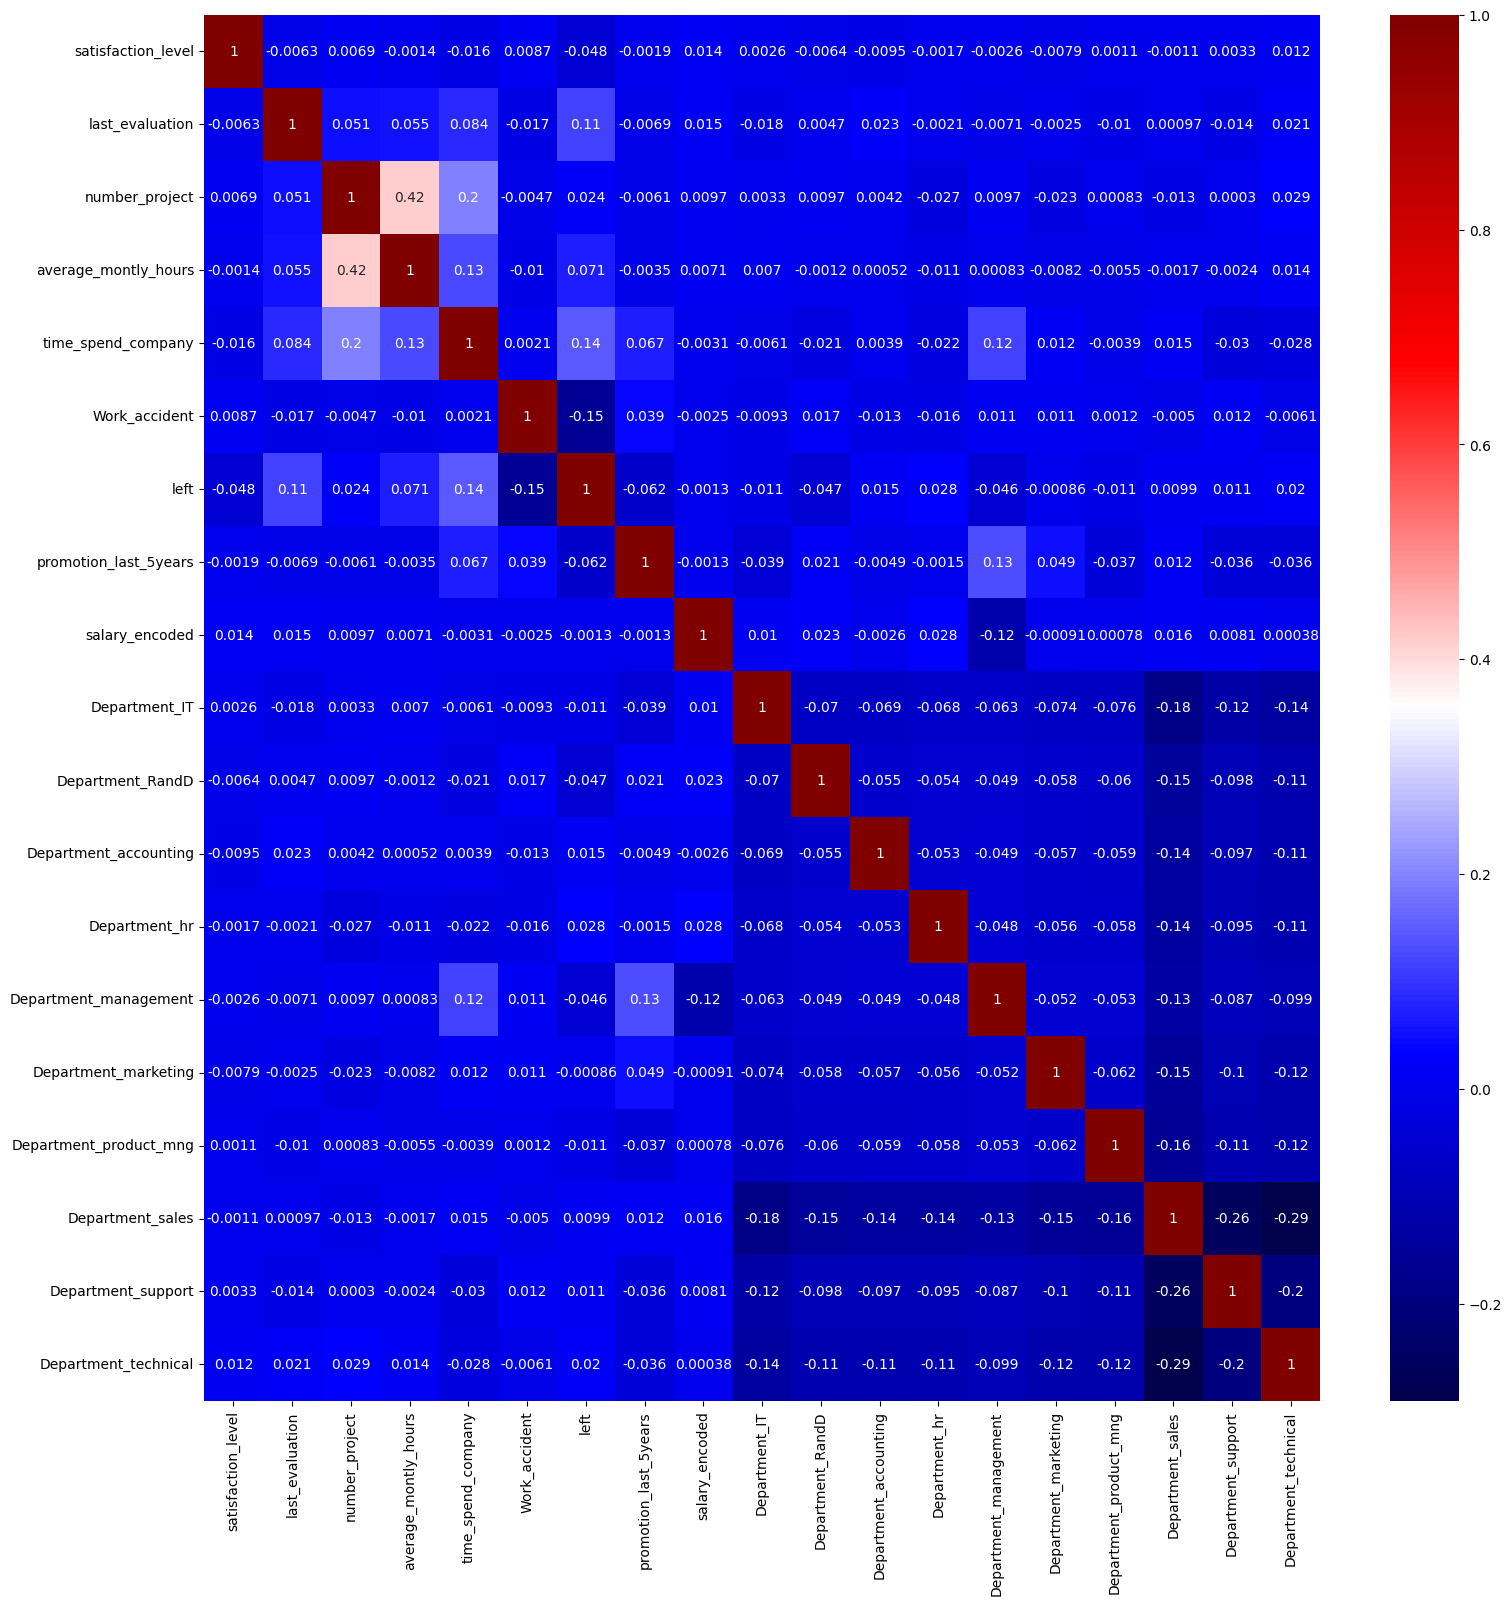

In [136]:
plt.figure(figsize=(18,18))
cor = df_encoded.corr()
sns.heatmap(cor, annot=True, cmap="seismic")
plt.show()